In [1]:
import pandas as pd
import numpy as np

dataset_test = pd.read_csv("TOP-STOCKS\\EA(Electronic Arts).csv")

## Tratamento de dados

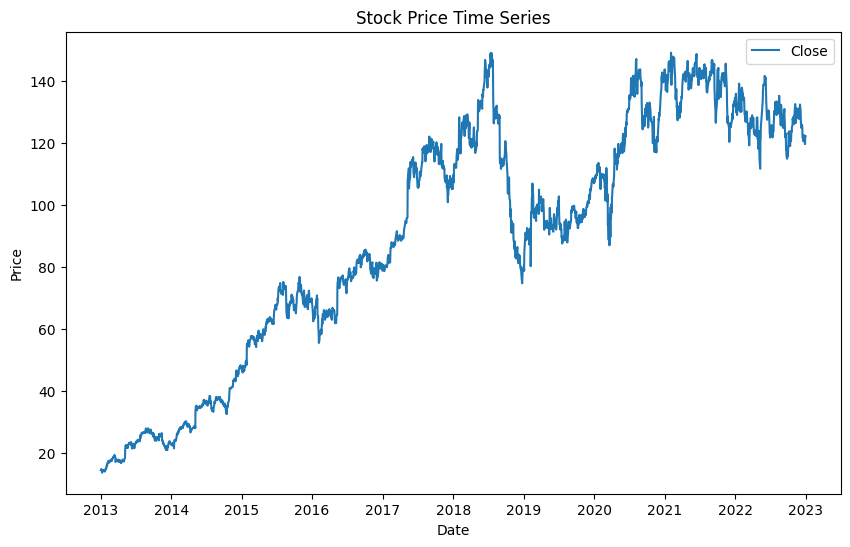

In [2]:
import matplotlib.pyplot as plt

dataset_test['datetime'] = pd.to_datetime(dataset_test['Date'])

dataset_test.set_index('datetime', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(dataset_test.index, dataset_test['Close'], label='Close')


# Customize the plot
plt.title('Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

In [3]:
from copy import deepcopy as dc

data = dataset_test[['Date', 'Close']]

def prep_dataframe(df, n_steps):
    df = dc(df)
    df.set_index('Date', inplace = True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        df.dropna(inplace=True)

    return df

shifted = prep_dataframe(data, 15)
shifted

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10),Close(t-11),Close(t-12),Close(t-13),Close(t-14),Close(t-15)
Date,,,,,,,,,,,,,,,,
2013-06-25,21.780001,21.610001,21.980000,22.150000,22.840000,23.030001,22.430000,21.809999,21.490000,21.540001,22.600000,22.870001,23.610001,23.280001,22.879999,22.719999
2013-06-26,21.790001,21.780001,21.610001,21.980000,22.150000,22.840000,23.030001,22.430000,21.809999,21.490000,21.540001,22.600000,22.870001,23.610001,23.280001,22.879999
2013-06-27,22.209999,21.790001,21.780001,21.610001,21.980000,22.150000,22.840000,23.030001,22.430000,21.809999,21.490000,21.540001,22.600000,22.870001,23.610001,23.280001
2013-06-28,22.990000,22.209999,21.790001,21.780001,21.610001,21.980000,22.150000,22.840000,23.030001,22.430000,21.809999,21.490000,21.540001,22.600000,22.870001,23.610001
2013-07-01,23.180000,22.990000,22.209999,21.790001,21.780001,21.610001,21.980000,22.150000,22.840000,23.030001,22.430000,21.809999,21.490000,21.540001,22.600000,22.870001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,121.510002,121.419998,122.500000,120.419998,120.790001,121.739998,121.730003,124.660004,125.680000,125.599998,124.709999,126.110001,126.010002,127.410004,130.419998,132.279999
2022-12-27,120.820000,121.510002,121.419998,122.500000,120.419998,120.790001,121.739998,121.730003,124.660004,125.680000,125.599998,124.709999,126.110001,126.010002,127.410004,130.419998
2022-12-28,119.540001,120.820000,121.510002,121.419998,122.500000,120.419998,120.790001,121.739998,121.730003,124.660004,125.680000,125.599998,124.709999,126.110001,126.010002,127.410004


In [4]:
shifted_np = shifted.to_numpy()
shifted_np

array([[ 21.780001,  21.610001,  21.98    , ...,  23.280001,  22.879999,
         22.719999],
       [ 21.790001,  21.780001,  21.610001, ...,  23.610001,  23.280001,
         22.879999],
       [ 22.209999,  21.790001,  21.780001, ...,  22.870001,  23.610001,
         23.280001],
       ...,
       [119.540001, 120.82    , 121.510002, ..., 126.110001, 126.010002,
        127.410004],
       [122.190002, 119.540001, 120.82    , ..., 124.709999, 126.110001,
        126.010002],
       [122.18    , 122.190002, 119.540001, ..., 125.599998, 124.709999,
        126.110001]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
import torch

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_np = scaler.fit_transform(shifted_np)
shifted_np

array([[-0.98734372, -0.98999997, -0.98421873, ..., -0.96390622,
        -0.97015625, -0.97265625],
       [-0.98718747, -0.98734372, -0.98999997, ..., -0.95874997,
        -0.96390622, -0.97015625],
       [-0.980625  , -0.98718747, -0.98734372, ..., -0.97031247,
        -0.95874997, -0.96390622],
       ...,
       [ 0.54015626,  0.56015624,  0.57093752, ...,  0.64281251,
         0.64125002,  0.66312505],
       [ 0.58156252,  0.54015626,  0.56015624, ...,  0.62093747,
         0.64281251,  0.64125002],
       [ 0.58140624,  0.58156252,  0.54015626, ...,  0.63484371,
         0.62093747,  0.64281251]])

In [6]:
x = shifted_np[:,1:]
y = shifted_np[:, 0]

x = dc(np.flip(x, axis=1))

In [7]:
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float()

x_tensor = x_tensor.reshape((-1, 15, 1))
y_tensor = y_tensor.reshape((-1,1))

## Definição do Modelo

In [8]:
import torch
import torch.nn as nn
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, stacked_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.stack_layers = stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers= stacked_layers, batch_first=True)
        self.inter = nn.Linear(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.stack_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.stack_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

## Predição

In [9]:
input_size = 1
hidden_size = 64
output_size = 1
stacked_layers = 5
responses = []

model = LSTMModel(input_size, hidden_size, output_size, stacked_layers)
model.load_state_dict(torch.load('modelo-MSFT.pt'))
model.eval()
with torch.no_grad():
    predicted = model(x_tensor.to(device)).to('cpu').numpy()

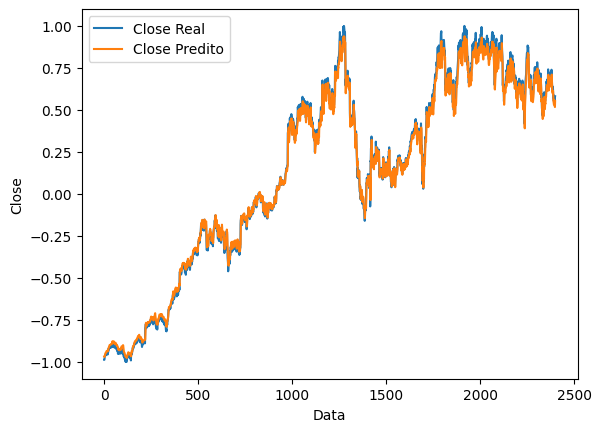

In [10]:
plt.plot(y_tensor, label='Close Real')
plt.plot(predicted, label='Close Predito')
plt.xlabel("Data")
plt.ylabel("Close")
plt.legend()
plt.show()

## Verificação de valores obtidos

In [11]:
print(len(y_tensor))
print(len(predicted))
y_tensor

2398
2398


tensor([[-0.9962],
        [-0.9982],
        [-1.0000],
        ...,
        [ 0.3335],
        [ 0.3760],
        [ 0.3798]])

In [12]:
predicted

array([[-0.9746672 ],
       [-0.97668934],
       [-0.97822994],
       ...,
       [ 0.36363703],
       [ 0.31897187],
       [ 0.34983945]], dtype=float32)

In [13]:
test = x_tensor[0]
test = test.reshape((-1, 15, 1))
test

tensor([[[-0.9764],
         [-0.9782],
         [-0.9810],
         [-0.9796],
         [-0.9808],
         [-0.9814],
         [-0.9837],
         [-0.9821],
         [-0.9846],
         [-0.9837],
         [-0.9838],
         [-0.9876],
         [-0.9902],
         [-0.9916],
         [-0.9963]]])

In [14]:
with torch.no_grad():
    predicted = model(test.to(device)).to('cpu').numpy()
predicted

array([[-0.97466713]], dtype=float32)

## Valores absolutos reais

In [15]:
test_pred = model(x_tensor.to(device)).detach().cpu().numpy().flatten()
dummie = np.zeros((x_tensor.shape[0], 16))
dummie[:,0] = test_pred
dummie = scaler.inverse_transform(dummie)

test_pred = dc(dummie[:, 0])
test_pred

array([ 16.1908483 ,  16.0210421 ,  15.89167287, ..., 128.57255242,
       124.82187566, 127.41392521])

In [16]:
dummies = np.zeros((x_tensor.shape[0],  16))
dummies[:, 0] = y_tensor.flatten()
dummies = scaler.inverse_transform(dummies)
new_y_test = dc(dummies[:, 0])
new_y_test

array([ 14.37964396,  14.21678498,  14.063571  , ..., 126.04000211,
       129.6100014 , 129.92999343])

In [17]:
test_pred

array([ 16.1908483 ,  16.0210421 ,  15.89167287, ..., 128.57255242,
       124.82187566, 127.41392521])

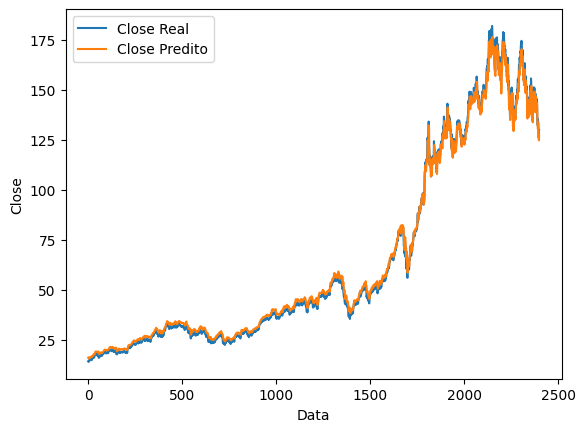

In [18]:
plt.plot(new_y_test, label='Close Real')
plt.plot(test_pred, label='Close Predito')
plt.xlabel("Data")
plt.ylabel("Close")
plt.legend()
plt.show()

In [19]:
new_y_test

array([ 14.37964396,  14.21678498,  14.063571  , ..., 126.04000211,
       129.6100014 , 129.92999343])

In [20]:
test_pred

array([ 16.1908483 ,  16.0210421 ,  15.89167287, ..., 128.57255242,
       124.82187566, 127.41392521])

## Métricas

In [21]:
mae = np.mean(np.abs(test_pred - new_y_test))
print("MAE:", mae)

MAE: 1.8716627741074494


In [22]:
mse = np.mean((test_pred - new_y_test)**2)
print("MSE:", mse)

MSE: 5.522051455716475


In [23]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 2.3499045631081437


In [24]:
mape = np.mean(np.abs((test_pred - new_y_test) / new_y_test)) * 100
print("MAPE:", mape)

MAPE: 4.008433688448084


In [25]:
from sklearn.metrics import r2_score

r2 = r2_score(new_y_test, test_pred)
print("R²:", r2)

R²: 0.9976772603576998


## Extra Tests

In [26]:
import torch
from sklearn.preprocessing import MinMaxScaler

values = np.asarray([335.40, 332.58, 328.39, 331.21, 332.89, 325.92, 313.85, 315.26, 321.18, 318.34, 318.52, 314.00, 311.74, 309.46, 308.97])
values
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_values = scaler.fit_transform([values])

tensor = torch.tensor(values).float()
tensor = tensor.reshape((-1, 15, 1))

print(tensor)
example_real = tensor

tensor([[[335.4000],
         [332.5800],
         [328.3900],
         [331.2100],
         [332.8900],
         [325.9200],
         [313.8500],
         [315.2600],
         [321.1800],
         [318.3400],
         [318.5200],
         [314.0000],
         [311.7400],
         [309.4600],
         [308.9700]]])


In [27]:
with torch.no_grad():
    predicted = model(example_real.to(device)).to('cpu').numpy()
predicted

array([[1.5487666]], dtype=float32)

In [34]:
test_pred2 = model(example_real.to(device)).detach().cpu().numpy().flatten()
dummie2 = np.zeros((example_real.shape[0], 15))
dummie2[:,0] = test_pred2
dummie2 = scaler.inverse_transform(dummie2)

test_pred2 = dc(dummie2[:, 0])
print("Pred: {:.2f}".format(test_pred2[0]))

Pred: 336.67


## Criação do ONNX

In [62]:
# torch.onnx.export(model, x_tensor, "model-V.5.onnx")

In [63]:
# import onnx

# # Load the ONNX model
# model = onnx.load("model-V.5.onnx")

# # Check that the model is well formed
# onnx.checker.check_model(model)

In [64]:
# print(onnx.helper.printable_graph(model.graph))

In [65]:
# import onnxruntime
# import numpy as np

# # Load the ONNX model
# model = onnxruntime.InferenceSession('model-V.5.onnx')

# # Prepare the input data
# input_data = x_tensor.numpy()  # Adjust the input data according to your model's input shape

# Run the inference
# output = model.run(None, {'input': input_data})  # Adjust the input name ('input') based on your model's input name

# # Extract the prediction
# prediction = output[0]

# # Process the prediction as needed
# print("Prediction:", prediction)

In [66]:
# input_data[0]

In [67]:
# for input in input_data:
#     input = input.reshape((-1, 15, 1))
#     output = model.run(None, {'input': input})